In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True) 

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Display the row's columns and data in dictionary format from Station class
first_row_station = session.query(Station).first()
first_row_station.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb54a162290>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [10]:
# Display the row's columns and data in dictionary format from Measurement class
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb54a16b710>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

# Exploratory Climate Analysis

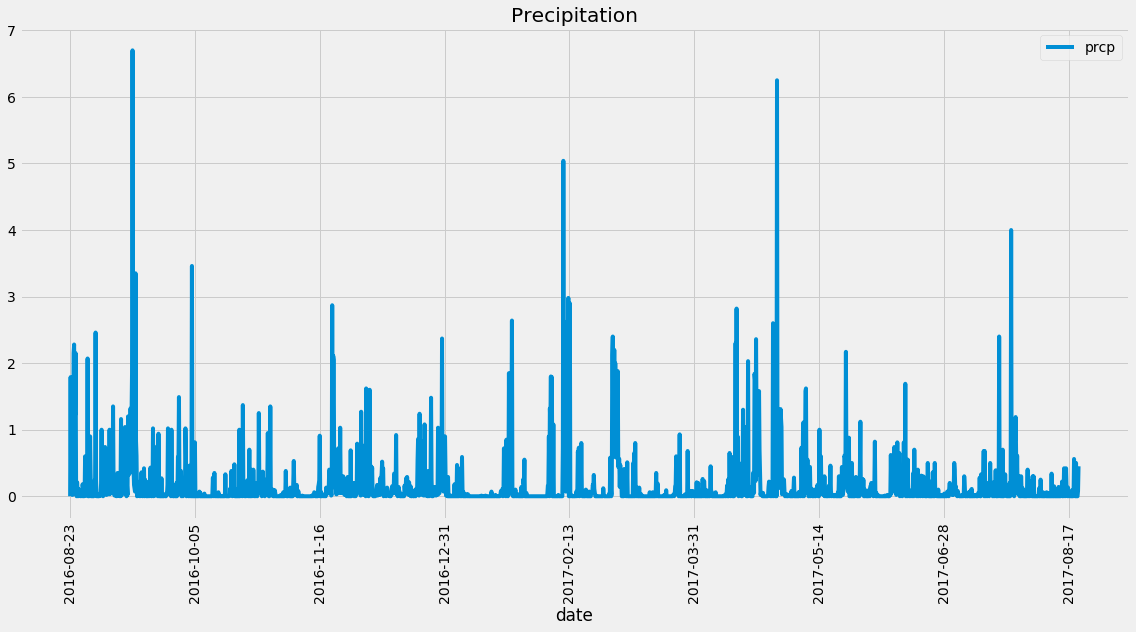

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for index in range(len(latest_date)):
    latest_date_str = latest_date[index]

date_year_ago = dt.date(int(latest_date_str[0:4]),int(latest_date_str[5:7]),int(latest_date_str[8:10])) - dt.timedelta(days=365)
date_year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >= date_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
precipitation_df['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
precipitation_df.set_index('date', inplace=True)


# Sort the dataframe by date
precipitation_df.sort_values('date', inplace=True)
precipitation_df.dropna(inplace=True)
precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation", use_index=True, rot = 90, figsize=(16,9))
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.agg([np.mean, np.median, np.min, np.max, np.var, np.std])
summary_statistics

,prcp
mean,0.177279
median,0.020000
amin,0.000000
amax,6.700000
var,0.212696
std,0.461190


In [13]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).distinct(Station.station).count()
station_count

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
USC00519281_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()
for data in USC00519281_data:
    (min_temp, max_temp, avg_temp) = data
    print(f"Lowest temp: {min_temp}, highest temp: {max_temp}, average temp: {avg_temp}")

Lowest temp: 54.0, highest temp: 85.0, average temp: 71.66378066378067


In [16]:
# Choose the station with the highest number of temperature observations.
temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc()).all()
temp_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(Measurement.date).\
                        filter(Measurement.station == 'USC00519281').\
                        order_by(Measurement.date.desc()).first()
latest_date

('2017-08-18')

In [18]:
temp_obs = session.query(Measurement.tobs).\
                        filter(Measurement.date >= '2016-09-01').\
                        filter(Measurement.station == 'USC00519281').all()
temp_obs

[(80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 (65.0),
 (68.0),
 (62.0),
 (75.0),
 (70.0),
 (69.0),
 (76.0),
 (76.0),
 

Text(0.5, 0, 'Temperature')

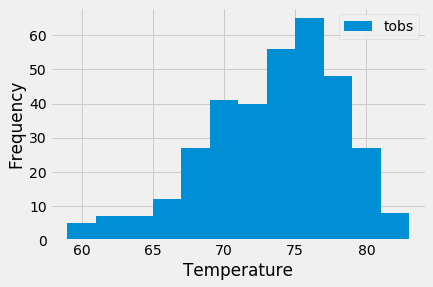

In [19]:
# Save the query results as a Pandas DataFrame
temp_obs_df = pd.DataFrame(temp_obs, columns=['tobs'])

# Use Pandas Plotting with Matplotlib to plot the data
temp_plot = temp_obs_df.plot.hist(bins=12)
temp_plot.set_xlabel("Temperature")

## Bonus Challenge Assignment

In [20]:
# Identify the average temperature in June at all stations across all years
# Month string in the format `%m`  
month_str = "06"  
june_temp = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == month_str).all()                        
june_avg_temp = np.mean(june_temp)
june_avg_temp

74.94411764705882

In [21]:
# Identify the average temperature in December at all stations across all years
# Month string in the format `%m`  
month_str = "12"  
dec_temp = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == month_str).all()
dec_avg_temp = np.mean(dec_temp)
dec_avg_temp

71.04152933421226

In [22]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(june_temp, dec_temp, equal_var=False)

Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_data = calc_temps('2017-03-25', '2017-04-07')

for temp in temp_data:
    (tmin, tavg, tmax) = temp
    print(f"{tmin}, {tavg}, {tmax}")

67.0, 74.74157303370787, 80.0


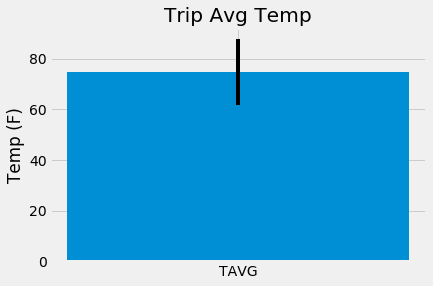

In [60]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(x='TAVG', height = tavg, yerr=(tmax-tmin))

# Give the chart a title, x label, and y label
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

# Print chart to screen
plt.show()

In [61]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
